In [98]:
import pandas as pd
import numpy as np
%matplotlib inline
import os

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# importing training data 
train = pd.read_csv('/content/drive/MyDrive/ML_Artivatic_dataset/train_indessa.csv')
train.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0


In [101]:
train.shape

(532428, 45)

In [102]:
# checking data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [103]:
# Data description
train.iloc[:,1:].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [104]:
for feature in train.columns:
  if train[feature].dtypes == 'object':
    print(feature, 'Number of levels', train[feature].nunique())
    print(train[feature].value_counts())
    print('\n')


term Number of levels 2
36 months    372793
60 months    159635
Name: term, dtype: int64


batch_enrolled Number of levels 104
              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64


grade Number of levels 7
B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64


sub_grade Number of levels 35
B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name:

In [105]:
# checking null value
train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [106]:
train.shape

(532428, 45)

In [107]:
#Droping columns which is not required
train = train.drop(train[['emp_title', 'zip_code','desc','batch_enrolled','title',
                          'addr_state','last_week_pay','sub_grade','verification_status_joint','purpose',
                          'initial_list_status','application_type','tot_coll_amt','mths_since_last_record','pymnt_plan']], axis=1)

In [109]:
train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
grade                               0
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
acc_now_deli

In [110]:
train['emp_length'].unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [111]:
train['emp_length'] = train['emp_length'].fillna('10+ years')

In [112]:
train['delinq_2yrs'].mean()

0.31444820928153383

In [113]:
train['mths_since_last_delinq'].mean()

34.05573470220184

In [114]:
train['mths_since_last_delinq'] = train['mths_since_last_delinq'].fillna(train['mths_since_last_delinq'].mean())

In [115]:
# train['mths_since_last_record'] = train['mths_since_last_record'].fillna(train['mths_since_last_record'].mean())

In [116]:
train['open_acc'] = train['open_acc'].fillna(train['open_acc'].mean())

In [117]:
train['pub_rec'] = train['pub_rec'].fillna(train['pub_rec'].mode())

In [118]:

train['revol_util'] = train['revol_util'].fillna(train['revol_util'].mean())

In [119]:
train['total_acc'] = train['total_acc'].fillna(train['total_acc'].mean())

In [120]:
train['collections_12_mths_ex_med']= train['collections_12_mths_ex_med'].fillna(0.0)

In [121]:
train['mths_since_last_major_derog'] = train['mths_since_last_major_derog'].fillna(train['mths_since_last_major_derog'].mean())

In [122]:
train['acc_now_delinq'] = train['acc_now_delinq'].fillna(train['acc_now_delinq'].mode())

In [123]:
train['tot_cur_bal'] = train['tot_cur_bal'].fillna(train['tot_cur_bal'].mean())

In [124]:
train['total_rev_hi_lim'] = train['total_rev_hi_lim'].fillna(train['total_rev_hi_lim'].mean())

In [125]:
train['collections_12_mths_ex_med'].unique()

array([ 0.,  1.,  2.,  3.,  4., 16.,  5.,  7., 14.])

In [126]:
train['delinq_2yrs'] = train['delinq_2yrs'].fillna(0.0)

In [127]:
train['inq_last_6mths'] = train['inq_last_6mths'].fillna(0.0)

In [128]:
train['pub_rec'] = train['pub_rec'].fillna(0.0)

In [129]:
train['acc_now_delinq'] = train['acc_now_delinq'].fillna(0.0)

In [130]:
train['annual_inc'] = train['annual_inc'].fillna(train['annual_inc'].mean())

In [131]:
train.isnull().sum().any()

False

In [132]:
train.isnull().sum().any()

False

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   int_rate                     532428 non-null  float64
 6   grade                        532428 non-null  object 
 7   emp_length                   532428 non-null  object 
 8   home_ownership               532428 non-null  object 
 9   annual_inc                   532428 non-null  float64
 10  verification_status          532428 non-null  object 
 11  dti                          532428 non-null  float64
 12  delinq_2yrs                  532428 non-null  float64
 13 

In [134]:
train['term'] = train['term'].replace({'36 months':0, '60 months':1})

In [135]:
train['grade'] = train['grade'].replace({'G':0, 'F':1,'E':2, 'D':3,'C':4, 'B':5, 'A':6})

In [136]:
train['emp_length'] = train['emp_length'].replace({'< 1 year':0, '1 year':1,'2 years':2, '3 years':3,'4 years':4,
                                                   '5 years':5, '6 years':6, '7 years':7, '8 years':8,
                                                   '9 years':9, '10+ years':10})

In [137]:

train['home_ownership'] = train['home_ownership'].replace({'ANY':0, 'NONE':1,'OTHER':2, 'OWN':3,'RENT':4,
                                                   'MORTGAGE':5})

In [138]:
train['verification_status'] = train['verification_status'].replace({'Not Verified':0, 'Verified':1,'Source Verified':2})

In [139]:
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,0,19.19,2,9,3,28700.0,2,33.88,0.0,1.0,50.000000,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.000000,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,0,10.99,5,0,5,65000.0,2,3.64,0.0,1.0,34.055735,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,44.121462,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,0,7.26,6,2,3,45000.0,0,18.42,0.0,0.0,34.055735,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,44.121462,0.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,0,19.72,3,10,4,105000.0,0,14.97,0.0,2.0,46.000000,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,44.121462,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,0,10.64,5,10,4,52000.0,1,20.16,0.0,0.0,34.055735,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,44.121462,0.0,47159.0,47033.0,0


In [140]:
train['loan_status'].value_counts(normalize=True)

0    0.763673
1    0.236327
Name: loan_status, dtype: float64

In [141]:
train.shape

(532428, 30)

In [142]:
X = train.drop('loan_status', axis=1)
y = train.pop('loan_status')

In [143]:
X.shape

(532428, 29)

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1, stratify=y)

In [145]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(399321, 29)
(399321,)
(133107, 29)
(133107,)


In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=20)
model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.8594764612930449
0.8580765850030426


In [149]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

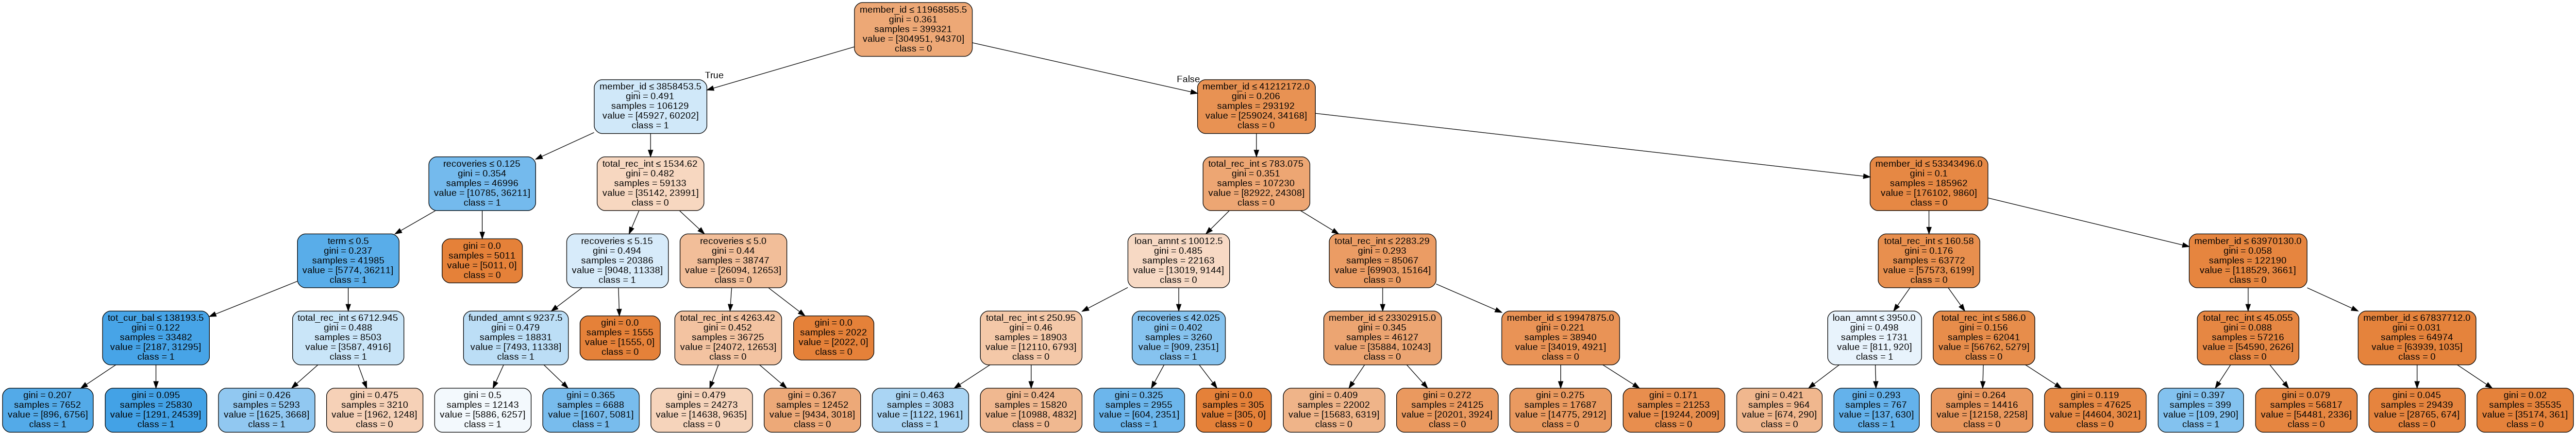

In [150]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=X.columns, class_names=['0','1'],
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('model1.png')
Image(graph.create_png())

In [151]:
pd.DataFrame(model1.feature_importances_, index= X.columns, columns=['Impt']).sort_values('Impt',ascending=False)

,Impt
member_id,0.707350
recoveries,0.137937
total_rec_int,0.101981
term,0.027954
loan_amnt,0.015558
funded_amnt,0.008357
tot_cur_bal,0.000862
pub_rec,0.000000
acc_now_delinq,0.000000
mths_since_last_major_derog,0.000000


In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfcl = RandomForestClassifier(n_estimators=100, max_depth=5)

In [154]:
model2 = rfcl.fit(X_train, y_train)

In [155]:
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.8310381873229807
0.8321951512692796


In [156]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
train_predict_prob = rfcl.predict_proba(X_train)
test_predict_prob = rfcl.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

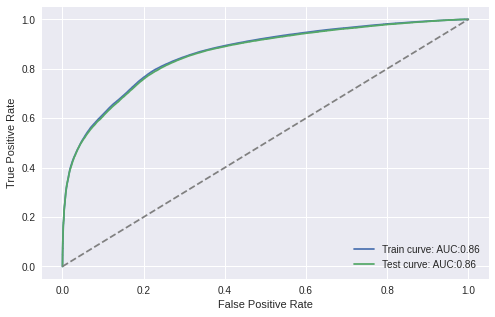

In [157]:
# Training and testing curve using Random forest here I am getting 86 percent accuracy of both.
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(rfcl, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(rfcl, X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey')


In [158]:
y_predict_test=rfcl.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_metrix=confusion_matrix(y_test,y_predict_test)
confusion_metrix

array([[100644,   1006],
       [ 21330,  10127]])

In [159]:
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90    101650
           1       0.91      0.32      0.48     31457

    accuracy                           0.83    133107
   macro avg       0.87      0.66      0.69    133107
weighted avg       0.85      0.83      0.80    133107



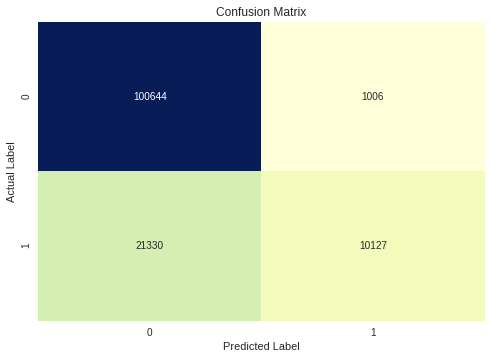

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [161]:
test_predict_prob = rfcl.predict_proba(X_test)
x['loan_status']=pd.DataFrame(test_predict_prob[:,1])

In [164]:
# Merging data frame with predicted value
new_data = pd.merge(train,x,how = 'left',left_index = True, right_index = True)
new_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,0,loan_status
0,58189336,14350,14350,14350.0,0,19.19,2,9,3,28700.0,2,33.88,0.0,1.0,50.000000,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.000000,0.0,28699.0,30800.0,0.234952,0.395842
1,70011223,4800,4800,4800.0,0,10.99,5,0,5,65000.0,2,3.64,0.0,1.0,34.055735,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,44.121462,0.0,9974.0,32900.0,0.150934,0.114966
2,70255675,10000,10000,10000.0,0,7.26,6,2,3,45000.0,0,18.42,0.0,0.0,34.055735,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,44.121462,0.0,38295.0,34900.0,0.137173,0.100136
3,1893936,15000,15000,15000.0,0,19.72,3,10,4,105000.0,0,14.97,0.0,2.0,46.000000,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,44.121462,0.0,55564.0,24700.0,0.179251,0.155788
4,7652106,16000,16000,16000.0,0,10.64,5,10,4,52000.0,1,20.16,0.0,0.0,34.055735,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,44.121462,0.0,47159.0,47033.0,0.149045,0.107767


In [170]:
sample_submission=new_data[['member_id','loan_status']]

In [181]:
sample_submission.dropna(inplace=True)

In [184]:
sample_submission.head(5)

,member_id,loan_status
0,58189336,0.395842
1,70011223,0.114966
2,70255675,0.100136
3,1893936,0.155788
4,7652106,0.107767


In [191]:
sample_submission.to_csv(r'desktop:\surajkumar\Admin\Desktop\file3.csv', index=False)